In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import RettaInterpolata, Interpolazione

In [2]:
fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * 10**(-6)
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

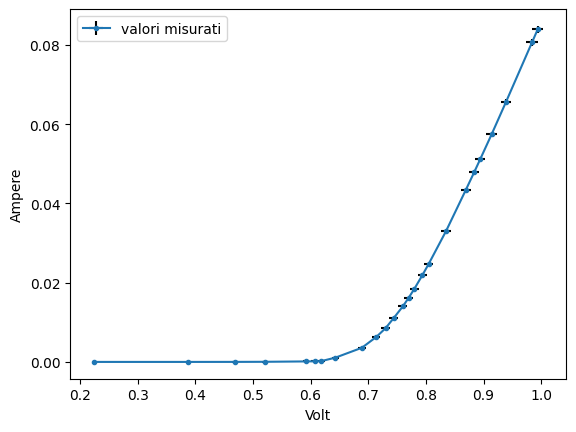

In [9]:
plt.title('')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.legend()
plt.show()

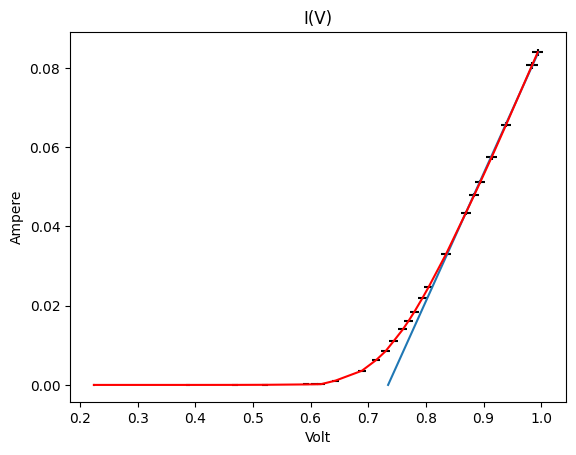


linearità A + BX
    
A: -0.2365304916486405 
B: 0.3220723277983215
sigmaA: 0.003330319254953677
sigmaB: 0.0036373351271087235

sigmaY: [0.0008395  0.00080623 0.0006563  0.00057443 0.00051095 0.0004795
 0.0004334  0.0003304 ]    
chiquadro ridotto: 0.87
df: 6
pvalue: 99.0%


In [4]:
N = 8
r = RettaInterpolata(V[:N],I[:N],sigmaI[:N])

plt.title('I(V)')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,color='red',marker='',ecolor='black')

y = np.linspace(0,I[0],100)
x = (y-r.A)/r.B

plt.plot(x,y)

plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()

print(r)

In [5]:
# VALORE DI SOGLIOLA

sogliola = -r.A/r.B 
print('Valore di sogliola: ',sogliola)

Valore di sogliola:  0.7344017825609456
